#  Data provided by CDC Case Surveillance Task Force available at
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf 
##### Export  'CSV for Excel' near top-right of page

# Import libraries

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format

# Load the data
##### *Data current as of 2020/10/02

In [353]:
covid_cdc = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')

# Inspect

In [354]:
covid_cdc

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/22,2020/03/15,2020/03/11,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",Yes,Yes,No,Yes
1,2020/03/23,2020/03/15,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Unknown,Unknown,Unknown,Unknown
2,2020/03/15,2020/03/15,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
3,2020/03/15,2020/03/15,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
4,2020/03/15,2020/03/15,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...
4481057,2020/09/15,2020/09/15,NaN,Laboratory-confirmed case,Female,Unknown,"White, Non-Hispanic",Missing,Missing,Missing,Missing
4481058,2020/09/15,2020/09/15,NaN,Laboratory-confirmed case,Male,Unknown,Unknown,Missing,Missing,Missing,Missing
4481059,2020/09/15,2020/09/15,NaN,Laboratory-confirmed case,Female,Unknown,Unknown,Missing,Missing,Missing,No
4481060,2020/09/15,2020/09/15,NaN,Probable Case,Missing,Unknown,"White, Non-Hispanic",No,Unknown,No,Yes


In [355]:
covid_cdc["pos_spec_dt"] = pd.to_datetime(covid_cdc["pos_spec_dt"])

In [356]:
covid_cdc['month'] = covid_cdc['pos_spec_dt'].apply(lambda x: x.month)

In [357]:
covid_cdc['month'].value_counts()

4.00    367743
7.00    266356
5.00    239819
8.00    210724
6.00    199876
3.00    158031
9.00     80946
2.00        62
1.00        11
Name: month, dtype: int64

In [358]:
covid_jan = covid_cdc.loc[covid_cdc['month'] == 1.0]
covid_feb = covid_cdc.loc[covid_cdc['month'] == 2.0]
covid_mar = covid_cdc.loc[covid_cdc['month'] == 3.0]
covid_apr = covid_cdc.loc[covid_cdc['month'] == 4.0]
covid_may = covid_cdc.loc[covid_cdc['month'] == 5.0]
covid_jun = covid_cdc.loc[covid_cdc['month'] == 6.0]
covid_jul = covid_cdc.loc[covid_cdc['month'] == 7.0]
covid_aug = covid_cdc.loc[covid_cdc['month'] == 8.0]
covid_sep = covid_cdc.loc[covid_cdc['month'] == 9.0]
covid_oct = covid_cdc.loc[covid_cdc['month'] == 10.0]

In [359]:
covid_cdc["Race and ethnicity (combined)"].value_counts()

Unknown                                                 1895793
White, Non-Hispanic                                     1102760
Hispanic/Latino                                          749798
Black, Non-Hispanic                                      487580
Multiple/Other, Non-Hispanic                             120991
Asian, Non-Hispanic                                       81150
American Indian/Alaska Native, Non-Hispanic               32393
Native Hawaiian/Other Pacific Islander, Non-Hispanic      10585
Name: Race and ethnicity (combined), dtype: int64

In [360]:
covid_cdc["sex"].value_counts()

Female     2301251
Male       2125664
Unknown      47041
Missing       6992
Other          102
Name: sex, dtype: int64

In [361]:
covid_cdc["sex"].value_counts()

Female     2301251
Male       2125664
Unknown      47041
Missing       6992
Other          102
Name: sex, dtype: int64

In [362]:
covid_cdc["age_group"].value_counts()

20 - 29 Years    869057
30 - 39 Years    748175
40 - 49 Years    694670
50 - 59 Years    671827
60 - 69 Years    468486
10 - 19 Years    386579
70 - 79 Years    263186
80+ Years        233588
0 - 9 Years      140213
Unknown            5188
Name: age_group, dtype: int64

In [363]:
covid_cdc["death_yn"].value_counts()

No         2075244
Missing    1740002
Unknown     529408
Yes         136408
Name: death_yn, dtype: int64

In [364]:
covid_cdc["current_status"].value_counts()

Laboratory-confirmed case    4322724
Probable Case                 158338
Name: current_status, dtype: int64

# White, Non-Hispanic, Male, 70-79 years old

## Parameters used:
* Race and ethnicity (combined) = 'White, Non-Hispanic'
* Sex = 'Male'
* Age_group = '70 -79 Years'
* Death_yn = 'Yes'
* Current_status = 'Laboratory-confirmed case'

In [365]:
 len(covid_cdc[(covid_cdc["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_cdc["sex"] == 'Male') & (covid_cdc["age_group"] == '70 - 79 Years') & (covid_cdc["death_yn"] == 'Yes')])

8543

In [366]:
 len(covid_cdc[(covid_cdc["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_cdc["sex"] == 'Male') & (covid_cdc["age_group"] == '70 - 79 Years') & (covid_cdc["current_status"] == 'Laboratory-confirmed case')])

47930

In [367]:
float(len(covid_cdc[(covid_cdc["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_cdc["sex"] == 'Male') & (covid_cdc["age_group"] == '70 - 79 Years') & (covid_cdc["death_yn"] == 'Yes')])) / float( len(covid_cdc[(covid_cdc["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_cdc["sex"] == 'Male') & (covid_cdc["age_group"] == '70 - 79 Years') & (covid_cdc["current_status"] == 'Laboratory-confirmed case')])) 

0.17823909868558313

In [368]:
 len(covid_cdc[(covid_cdc["age_group"] == '70 - 79 Years') & (covid_cdc["death_yn"] == 'Yes')])

33526

In [369]:
 len(covid_cdc[(covid_cdc["age_group"] == '70 - 79 Years')])

263186

In [370]:
monthly_mortality = {'Month':['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'], 'Mortality (%)':['','','','','','','','']}
monthly_mortality_df = pd.DataFrame(monthly_mortality)


In [371]:
#monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Jan'] = np.nan
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_feb["sex"] == 'Male') & (covid_feb["age_group"] == '70 - 79 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_feb["sex"] == 'Male') & (covid_feb["age_group"] == '70 - 79 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_mar["sex"] == 'Male') & (covid_mar["age_group"] == '70 - 79 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_mar["sex"] == 'Male') & (covid_mar["age_group"] == '70 - 79 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_mar["sex"] == 'Male') & (covid_mar["age_group"] == '70 - 79 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_mar["sex"] == 'Male') & (covid_mar["age_group"] == '70 - 79 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_apr["sex"] == 'Male') & (covid_apr["age_group"] == '70 - 79 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_apr["sex"] == 'Male') & (covid_apr["age_group"] == '70 - 79 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'May'] = float(len(covid_may[(covid_may["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_may["sex"] == 'Male') & (covid_may["age_group"] == '70 - 79 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_may["sex"] == 'Male') & (covid_may["age_group"] == '70 - 79 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_jun["sex"] == 'Male') & (covid_jun["age_group"] == '70 - 79 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_jun["sex"] == 'Male') & (covid_jun["age_group"] == '70 - 79 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_jul["sex"] == 'Male') & (covid_jul["age_group"] == '70 - 79 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_jul["sex"] == 'Male') & (covid_jul["age_group"] == '70 - 79 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_aug["sex"] == 'Male') & (covid_aug["age_group"] == '70 - 79 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_aug["sex"] == 'Male') & (covid_aug["age_group"] == '70 - 79 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_sep["sex"] == 'Male') & (covid_sep["age_group"] == '70 - 79 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["Race and ethnicity (combined)"] == 'White, Non-Hispanic') & (covid_sep["sex"] == 'Male') & (covid_sep["age_group"] == '70 - 79 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
#monthly_mortality_df['Mortality (%)'].loc[monthly_mortality_df['Month'] == 'Oct'] = np.nan

In [372]:
monthly_mortality_df = monthly_mortality_df.set_index('Month')
monthly_mortality_df.columns.name = monthly_mortality_df.index.name
monthly_mortality_df.index.name = None

In [373]:
monthly_mortality_df

Month,Mortality (%)
Feb,66.67
Mar,30.85
Apr,33.21
May,20.02
Jun,10.95
Jul,11.56
Aug,9.93
Sep,5.80


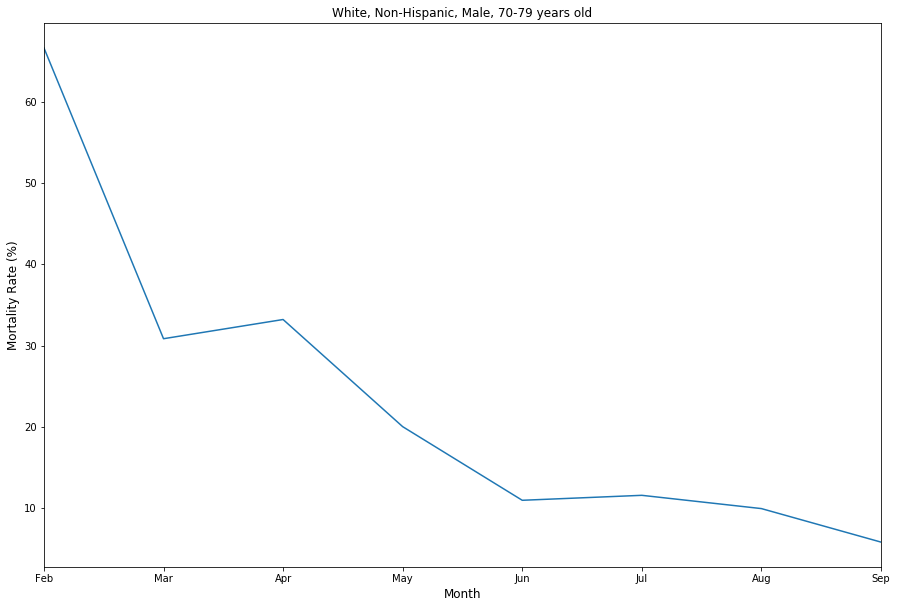

In [374]:
monthly_mortality_df['Mortality (%)'].plot(figsize=(15,10), title="White, Non-Hispanic, Male, 70-79 years old")
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.show()

In [375]:
covid_cdc["age_group"].unique()

array(['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '30 - 39 Years',
       '50 - 59 Years', '60 - 69 Years', '70 - 79 Years', '40 - 49 Years',
       '80+ Years', nan, 'Unknown'], dtype=object)

# All race and sex by age group

In [376]:
monthly_mortality_by_age_group_df_0_9 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_0_9 = pd.DataFrame(monthly_mortality_by_age_group_df_0_9)
monthly_mortality_by_age_group_df_10_19 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_10_19 = pd.DataFrame(monthly_mortality_by_age_group_df_10_19)
monthly_mortality_by_age_group_df_20_29 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_20_29 = pd.DataFrame(monthly_mortality_by_age_group_df_20_29)
monthly_mortality_by_age_group_df_30_39 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_30_39 = pd.DataFrame(monthly_mortality_by_age_group_df_30_39)
monthly_mortality_by_age_group_df_40_49 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_40_49 = pd.DataFrame(monthly_mortality_by_age_group_df_40_49)
monthly_mortality_by_age_group_df_50_59 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_50_59 = pd.DataFrame(monthly_mortality_by_age_group_df_50_59)
monthly_mortality_by_age_group_df_60_69 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_60_69 = pd.DataFrame(monthly_mortality_by_age_group_df_60_69)
monthly_mortality_by_age_group_df_70_79 = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_70_79 = pd.DataFrame(monthly_mortality_by_age_group_df_70_79)
monthly_mortality_by_age_group_df_80_plus = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_80_plus = pd.DataFrame(monthly_mortality_by_age_group_df_80_plus)
monthly_mortality_by_age_group_df_nan = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_nan = pd.DataFrame(monthly_mortality_by_age_group_df_nan)
monthly_mortality_by_age_group_df_Unknown = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], 'Mortality (%)':['','','','','','','','','','']}
monthly_mortality_by_age_group_df_Unknown = pd.DataFrame(monthly_mortality_by_age_group_df_Unknown)

In [377]:
dfs = [monthly_mortality_by_age_group_df_0_9, monthly_mortality_by_age_group_df_10_19, monthly_mortality_by_age_group_df_20_29, monthly_mortality_by_age_group_df_30_39, monthly_mortality_by_age_group_df_40_49, monthly_mortality_by_age_group_df_50_59, monthly_mortality_by_age_group_df_60_69, monthly_mortality_by_age_group_df_70_79, monthly_mortality_by_age_group_df_80_plus, monthly_mortality_by_age_group_df_nan, monthly_mortality_by_age_group_df_Unknown]

##### Please excuse the following spaghetti

In [378]:
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '0 - 9 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '0 - 9 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '0 - 9 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '0 - 9 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '0 - 9 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '0 - 9 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '0 - 9 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '0 - 9 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '0 - 9 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '0 - 9 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '0 - 9 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '0 - 9 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '0 - 9 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '0 - 9 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '0 - 9 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '0 - 9 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '0 - 9 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '0 - 9 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '0 - 9 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '0 - 9 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_0_9['Mortality (%)'].loc[monthly_mortality_by_age_group_df_0_9['Month'] == 'Oct'] = np.nan


In [379]:
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '10 - 19 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '10 - 19 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '10 - 19 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '10 - 19 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '10 - 19 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '10 - 19 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '10 - 19 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '10 - 19 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '10 - 19 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '10 - 19 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '10 - 19 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '10 - 19 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '10 - 19 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '10 - 19 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '10 - 19 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '10 - 19 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '10 - 19 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '10 - 19 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '10 - 19 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '10 - 19 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_10_19['Mortality (%)'].loc[monthly_mortality_by_age_group_df_10_19['Month'] == 'Oct'] = np.nan


In [380]:
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '20 - 29 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '20 - 29 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '20 - 29 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '20 - 29 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '20 - 29 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '20 - 29 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '20 - 29 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '20 - 29 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '20 - 29 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '20 - 29 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '20 - 29 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '20 - 29 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '20 - 29 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '20 - 29 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '20 - 29 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '20 - 29 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '20 - 29 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '20 - 29 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '20 - 29 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '20 - 29 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_20_29['Mortality (%)'].loc[monthly_mortality_by_age_group_df_20_29['Month'] == 'Oct'] = np.nan


In [381]:
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '30 - 39 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '30 - 39 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '30 - 39 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '30 - 39 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '30 - 39 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '30 - 39 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '30 - 39 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '30 - 39 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '30 - 39 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '30 - 39 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '30 - 39 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '30 - 39 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '30 - 39 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '30 - 39 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '30 - 39 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '30 - 39 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '30 - 39 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '30 - 39 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '30 - 39 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '30 - 39 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_30_39['Mortality (%)'].loc[monthly_mortality_by_age_group_df_30_39['Month'] == 'Oct'] = np.nan


In [382]:
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '40 - 49 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '40 - 49 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '40 - 49 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '40 - 49 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '40 - 49 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '40 - 49 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '40 - 49 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '40 - 49 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '40 - 49 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '40 - 49 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '40 - 49 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '40 - 49 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '40 - 49 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '40 - 49 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '40 - 49 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '40 - 49 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '40 - 49 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '40 - 49 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '40 - 49 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '40 - 49 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_40_49['Mortality (%)'].loc[monthly_mortality_by_age_group_df_40_49['Month'] == 'Oct'] = np.nan


In [383]:
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '50 - 59 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '50 - 59 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '50 - 59 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '50 - 59 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '50 - 59 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '50 - 59 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '50 - 59 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '50 - 59 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '50 - 59 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '50 - 59 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '50 - 59 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '50 - 59 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '50 - 59 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '50 - 59 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '50 - 59 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '50 - 59 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '50 - 59 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '50 - 59 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '50 - 59 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '50 - 59 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_50_59['Mortality (%)'].loc[monthly_mortality_by_age_group_df_50_59['Month'] == 'Oct'] = np.nan


In [384]:
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '60 - 69 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '60 - 69 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '60 - 69 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '60 - 69 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '60 - 69 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '60 - 69 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '60 - 69 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '60 - 69 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '60 - 69 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '60 - 69 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '60 - 69 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '60 - 69 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '60 - 69 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '60 - 69 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '60 - 69 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '60 - 69 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '60 - 69 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '60 - 69 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '60 - 69 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '60 - 69 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_60_69['Mortality (%)'].loc[monthly_mortality_by_age_group_df_60_69['Month'] == 'Oct'] = np.nan


In [385]:
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '70 - 79 Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '70 - 79 Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '70 - 79 Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '70 - 79 Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '70 - 79 Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '70 - 79 Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '70 - 79 Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '70 - 79 Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '70 - 79 Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '70 - 79 Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '70 - 79 Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '70 - 79 Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '70 - 79 Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '70 - 79 Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '70 - 79 Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '70 - 79 Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '70 - 79 Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '70 - 79 Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '70 - 79 Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '70 - 79 Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_70_79['Mortality (%)'].loc[monthly_mortality_by_age_group_df_70_79['Month'] == 'Oct'] = np.nan


In [386]:
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == '80+ Years') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == '80+ Years') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == '80+ Years') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == '80+ Years') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == '80+ Years') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == '80+ Years') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == '80+ Years') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == '80+ Years') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == '80+ Years') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == '80+ Years') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == '80+ Years') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == '80+ Years') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == '80+ Years') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == '80+ Years') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == '80+ Years') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == '80+ Years') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == '80+ Years') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == '80+ Years') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == '80+ Years') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == '80+ Years') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_80_plus['Mortality (%)'].loc[monthly_mortality_by_age_group_df_80_plus['Month'] == 'Oct'] = np.nan


In [387]:
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == 'nan') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == 'nan') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == 'nan') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == 'nan') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == 'nan') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == 'nan') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == 'nan') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == 'nan') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == 'nan') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == 'nan') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == 'nan') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == 'nan') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == 'nan') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == 'nan') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == 'nan') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == 'nan') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == 'nan') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == 'nan') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == 'nan') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == 'nan') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_nan['Mortality (%)'].loc[monthly_mortality_by_age_group_df_nan['Month'] == 'Oct'] = np.nan


In [388]:
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Jan'] = float(len(covid_jan[(covid_jan["age_group"] == 'Unknown') & (covid_jan["death_yn"] == 'Yes')])) / float( len(covid_jan[(covid_jan["age_group"] == 'Unknown') & (covid_jan["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Jan'] = np.nan 
try:  
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Feb'] = float(len(covid_feb[(covid_feb["age_group"] == 'Unknown') & (covid_feb["death_yn"] == 'Yes')])) / float( len(covid_feb[(covid_feb["age_group"] == 'Unknown') & (covid_feb["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Feb'] = np.nan 
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Mar'] = float(len(covid_mar[(covid_mar["age_group"] == 'Unknown') & (covid_mar["death_yn"] == 'Yes')])) / float( len(covid_mar[(covid_mar["age_group"] == 'Unknown') & (covid_mar["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Mar'] = np.nan 
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Apr'] = float(len(covid_apr[(covid_apr["age_group"] == 'Unknown') & (covid_apr["death_yn"] == 'Yes')])) / float( len(covid_apr[(covid_apr["age_group"] == 'Unknown') & (covid_apr["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Apr'] = np.nan 
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'May'] = float(len(covid_may[(covid_may["age_group"] == 'Unknown') & (covid_may["death_yn"] == 'Yes')])) / float( len(covid_may[(covid_may["age_group"] == 'Unknown') & (covid_may["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'May'] = np.nan 
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Jun'] = float(len(covid_jun[(covid_jun["age_group"] == 'Unknown') & (covid_jun["death_yn"] == 'Yes')])) / float( len(covid_jun[(covid_jun["age_group"] == 'Unknown') & (covid_jun["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Jun'] = np.nan 
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Jul'] = float(len(covid_jul[(covid_jul["age_group"] == 'Unknown') & (covid_jul["death_yn"] == 'Yes')])) / float( len(covid_jul[(covid_jul["age_group"] == 'Unknown') & (covid_jul["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Jul'] = np.nan 
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Aug'] = float(len(covid_aug[(covid_aug["age_group"] == 'Unknown') & (covid_aug["death_yn"] == 'Yes')])) / float( len(covid_aug[(covid_aug["age_group"] == 'Unknown') & (covid_aug["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Aug'] = np.nan
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Sep'] = float(len(covid_sep[(covid_sep["age_group"] == 'Unknown') & (covid_sep["death_yn"] == 'Yes')])) / float( len(covid_sep[(covid_sep["age_group"] == 'Unknown') & (covid_sep["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Sep'] = np.nan
try:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Oct'] = float(len(covid_oct[(covid_oct["age_group"] == 'Unknown') & (covid_oct["death_yn"] == 'Yes')])) / float( len(covid_oct[(covid_oct["age_group"] == 'Unknown') & (covid_oct["current_status"] == 'Laboratory-confirmed case')]))*100
except ZeroDivisionError:
    monthly_mortality_by_age_group_df_Unknown['Mortality (%)'].loc[monthly_mortality_by_age_group_df_Unknown['Month'] == 'Oct'] = np.nan


In [389]:
monthly_mortality_by_age_group_df_0_9

,Month,Mortality (%)
0,Jan,NaN
1,Feb,NaN
2,Mar,0.26
3,Apr,0.08
4,May,0.04
5,Jun,0.04
6,Jul,0.03
7,Aug,0.01
8,Sep,0.07
9,Oct,NaN


In [390]:
monthly_mortality_by_age_group_df_10_19

,Month,Mortality (%)
0,Jan,NaN
1,Feb,0.00
2,Mar,0.24
3,Apr,0.06
4,May,0.03
5,Jun,0.03
6,Jul,0.01
7,Aug,0.01
8,Sep,0.02
9,Oct,NaN


In [391]:
monthly_mortality_by_age_group_df_20_29

,Month,Mortality (%)
0,Jan,0.00
1,Feb,0.00
2,Mar,0.29
3,Apr,0.18
4,May,0.09
5,Jun,0.05
6,Jul,0.03
7,Aug,0.04
8,Sep,0.04
9,Oct,NaN


In [392]:
monthly_mortality_by_age_group_df_30_39

,Month,Mortality (%)
0,Jan,0.00
1,Feb,0.00
2,Mar,0.83
3,Apr,0.41
4,May,0.19
5,Jun,0.17
6,Jul,0.12
7,Aug,0.12
8,Sep,0.13
9,Oct,NaN


In [393]:
monthly_mortality_by_age_group_df_40_49

,Month,Mortality (%)
0,Jan,0.00
1,Feb,11.11
2,Mar,1.84
3,Apr,1.18
4,May,0.46
5,Jun,0.36
6,Jul,0.31
7,Aug,0.27
8,Sep,0.11
9,Oct,NaN


In [394]:
monthly_mortality_by_age_group_df_50_59

,Month,Mortality (%)
0,Jan,0.00
1,Feb,13.33
2,Mar,4.14
3,Apr,2.96
4,May,1.38
5,Jun,0.93
6,Jul,0.90
7,Aug,0.76
8,Sep,0.37
9,Oct,NaN


In [395]:
monthly_mortality_by_age_group_df_60_69

,Month,Mortality (%)
0,Jan,NaN
1,Feb,25.00
2,Mar,9.56
3,Apr,8.71
4,May,4.30
5,Jun,2.81
6,Jul,2.93
7,Aug,2.43
8,Sep,1.11
9,Oct,NaN


In [396]:
monthly_mortality_by_age_group_df_70_79

,Month,Mortality (%)
0,Jan,NaN
1,Feb,60.00
2,Mar,22.34
3,Apr,21.45
4,May,11.77
5,Jun,7.93
6,Jul,8.44
7,Aug,7.34
8,Sep,3.85
9,Oct,NaN


In [397]:
monthly_mortality_by_age_group_df_80_plus

,Month,Mortality (%)
0,Jan,NaN
1,Feb,55.56
2,Mar,40.51
3,Apr,35.27
4,May,23.32
5,Jun,17.50
6,Jul,19.32
7,Aug,18.30
8,Sep,10.55
9,Oct,NaN


In [398]:
monthly_mortality_by_age_group_df_nan

,Month,Mortality (%)
0,Jan,NaN
1,Feb,NaN
2,Mar,NaN
3,Apr,NaN
4,May,NaN
5,Jun,NaN
6,Jul,NaN
7,Aug,NaN
8,Sep,NaN
9,Oct,NaN


In [399]:
monthly_mortality_by_age_group_df_Unknown

,Month,Mortality (%)
0,Jan,NaN
1,Feb,0.00
2,Mar,0.52
3,Apr,0.21
4,May,0.00
5,Jun,0.00
6,Jul,0.00
7,Aug,0.00
8,Sep,0.00
9,Oct,NaN


# Consolidate and clean age group data

In [400]:
monthly_mortality_by_age_group_df_merged = monthly_mortality_by_age_group_df_0_9.merge(monthly_mortality_by_age_group_df_10_19,on='Month').merge(monthly_mortality_by_age_group_df_20_29,on='Month').merge(monthly_mortality_by_age_group_df_30_39,on='Month').merge(monthly_mortality_by_age_group_df_40_49,on='Month').merge(monthly_mortality_by_age_group_df_50_59,on='Month').merge(monthly_mortality_by_age_group_df_60_69,on='Month').merge(monthly_mortality_by_age_group_df_70_79,on='Month').merge(monthly_mortality_by_age_group_df_80_plus,on='Month')
monthly_mortality_by_age_group_df_merged.columns = ["Month", "0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]

In [401]:
monthly_mortality_by_age_group_df_merged = monthly_mortality_by_age_group_df_merged.set_index('Month')
monthly_mortality_by_age_group_df_merged.columns.name = monthly_mortality_by_age_group_df_merged.index.name
monthly_mortality_by_age_group_df_merged.index.name = None

In [402]:
cols = monthly_mortality_by_age_group_df_merged.columns
monthly_mortality_by_age_group_df_merged[cols] = monthly_mortality_by_age_group_df_merged[cols].replace({'0':np.nan, 0:np.nan})

In [403]:
monthly_mortality_by_age_group_df_merged = monthly_mortality_by_age_group_df_merged.drop(monthly_mortality_by_age_group_df_merged.index[0])

In [404]:
monthly_mortality_by_age_group_df_merged = monthly_mortality_by_age_group_df_merged.drop(monthly_mortality_by_age_group_df_merged.index[-1])

# Mortality (%) by age group

In [405]:
monthly_mortality_by_age_group_df_merged

Month,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
Feb,nan,nan,nan,nan,11.11,13.33,25.00,60.00,55.56
Mar,0.26,0.24,0.29,0.83,1.84,4.14,9.56,22.34,40.51
Apr,0.08,0.06,0.18,0.41,1.18,2.96,8.71,21.45,35.27
May,0.04,0.03,0.09,0.19,0.46,1.38,4.30,11.77,23.32
Jun,0.04,0.03,0.05,0.17,0.36,0.93,2.81,7.93,17.50
Jul,0.03,0.01,0.03,0.12,0.31,0.90,2.93,8.44,19.32
Aug,0.01,0.01,0.04,0.12,0.27,0.76,2.43,7.34,18.30
Sep,0.07,0.02,0.04,0.13,0.11,0.37,1.11,3.85,10.55


# Visualizations

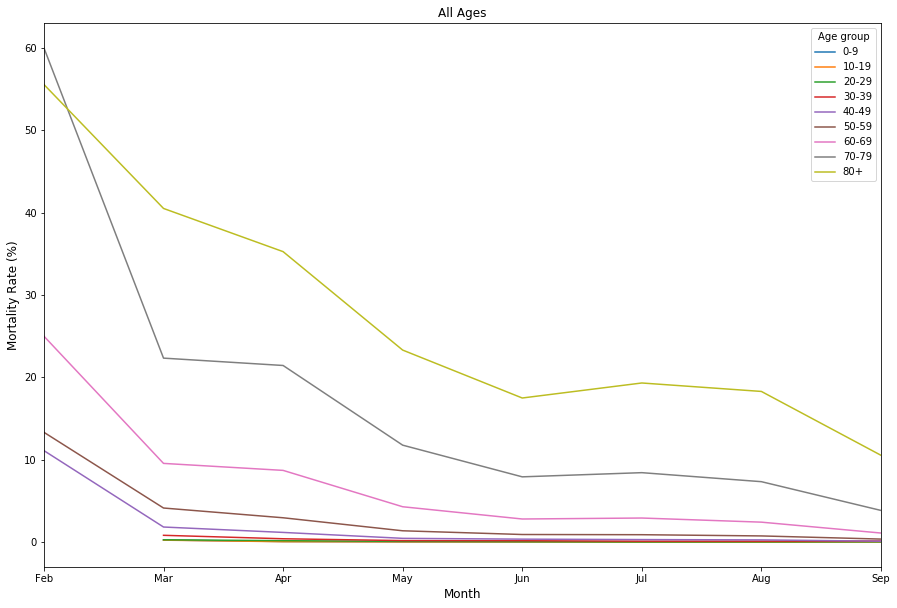

In [406]:
monthly_mortality_by_age_group_df_merged.plot(figsize=(15,10), title="All Ages")
plt.legend(title='Age group')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.show()

# Age group under 40

In [407]:
under_40 = monthly_mortality_by_age_group_df_merged.iloc[:, 0:4]
under_40

Month,0-9,10-19,20-29,30-39
Feb,nan,nan,nan,nan
Mar,0.26,0.24,0.29,0.83
Apr,0.08,0.06,0.18,0.41
May,0.04,0.03,0.09,0.19
Jun,0.04,0.03,0.05,0.17
Jul,0.03,0.01,0.03,0.12
Aug,0.01,0.01,0.04,0.12
Sep,0.07,0.02,0.04,0.13


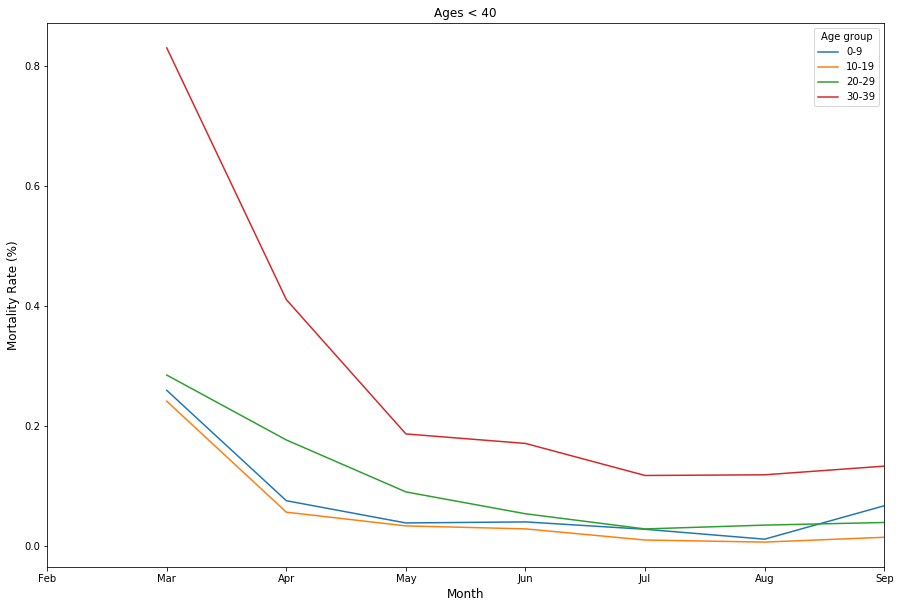

In [408]:
under_40.plot(figsize=(15,10), title="Ages < 40")
plt.legend(title='Age group')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.show()

# Age group 40+

In [409]:
over_40 = monthly_mortality_by_age_group_df_merged.iloc[:, 4:]
over_40

Month,40-49,50-59,60-69,70-79,80+
Feb,11.11,13.33,25.00,60.00,55.56
Mar,1.84,4.14,9.56,22.34,40.51
Apr,1.18,2.96,8.71,21.45,35.27
May,0.46,1.38,4.30,11.77,23.32
Jun,0.36,0.93,2.81,7.93,17.50
Jul,0.31,0.90,2.93,8.44,19.32
Aug,0.27,0.76,2.43,7.34,18.30
Sep,0.11,0.37,1.11,3.85,10.55


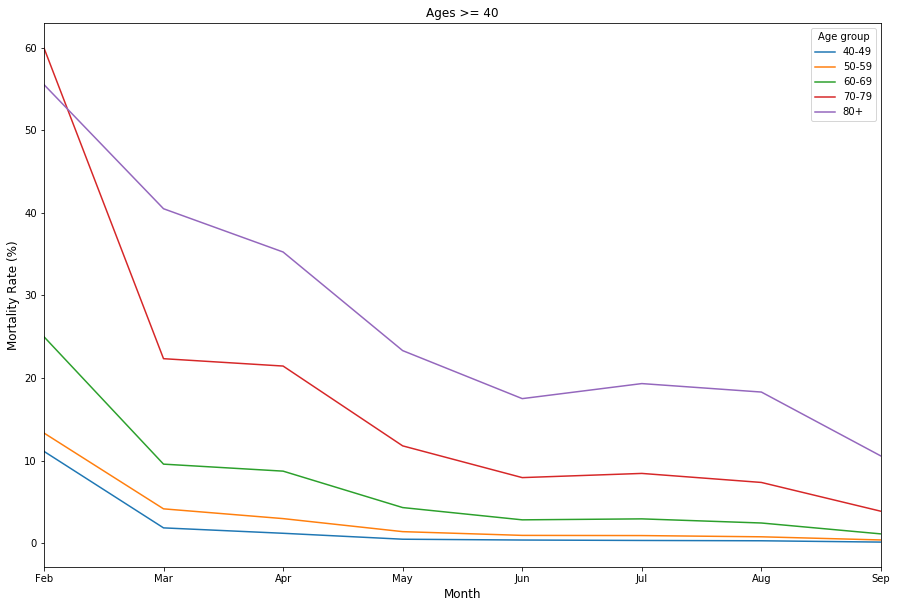

In [410]:
over_40.plot(figsize=(15,10), title="Ages >= 40")
plt.legend(title='Age group')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.show()